In [1]:
import pandas as pd
import scipy.signal
import plotly
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('reumo_final.csv', index_col='Unnamed: 0')
df

,od,ano,valor_m2_vpl,dist_metro
29,1,1995,2038.420646,791.836068
30,1,1996,2092.362073,791.836068
31,1,1997,2101.782314,791.836068
32,1,1998,2106.662125,791.836068
33,1,1999,2105.847268,791.836068
...,...,...,...,...
9757,342,2015,1046.565815,5945.762134
9758,342,2016,1030.352381,5945.762134
9759,342,2017,1024.381486,5945.762134
9760,342,2018,1024.829395,5872.288516


In [3]:
anos = list(df['ano'].unique())
collection = {}

for ano in anos:
    # Create a copy of the filtered DataFrame to avoid SettingWithCopyWarning
    df_ano = df[df['ano'] == ano].sort_values(by=['dist_metro'], ascending=True).copy()
    x = df_ano['dist_metro']
    y = df_ano['valor_m2_vpl']
    
    # Ensure the window length is odd and less than the size of y
    window = min(299, len(y) - (1 if len(y) % 2 == 0 else 0))
    order = 3
    
    # Apply the Savitzky-Golay filter
    try:
        yhat = scipy.signal.savgol_filter(y, window, order)
        # Add the filtered data as a new column
        df_ano['valor_m2_vpl_filtrado'] = yhat
        # Add to the collection
        collection[ano] = df_ano
    except ValueError as e:
        # Handle the error if the window size is larger than the data size
        print(f"Error for year {ano}: {e}")
    
    # The break statement was here; if you want to process only the first year, keep it.
    # If you want to process all years, remove it.
    # break


In [4]:
# faz um merge de todos os values do collection
# df_final = pd.concat(collection.values(), ignore_index=True)
# df_final

In [5]:
# sort df by the dist_metro column, ascending order
# df = df.sort_values(by=['dist_metro'], ascending=True)
# df

In [6]:
# sort the anos: 
anos.sort()
# anos

In [8]:
# plotar valor_m2_vpl e valor_m2_vpl_filtrado num mesmo grafico do plotly

for ano in anos:
    # print(ano)
    fig = go.Figure()
    
    df_ano = collection[ano]
    # print(df_ano.shape)
    # force the data to be sorted by dist_metro
    df_ano = df_ano.sort_values(by=['dist_metro'], ascending=True)
    
    x = df_ano['dist_metro']
    y = df_ano['valor_m2_vpl']
    yhat = df_ano['valor_m2_vpl_filtrado']

    fig.add_scatter(x=x, y=y, mode='markers', name='Original',  marker=dict(size=10))
    # add a line for filtered
    fig.add_trace(go.Scatter(x=x, y=yhat, mode='lines', name='Filtrado', line=dict(width=4)))
    # add title with the ano
    fig.update_layout(title_text=f'{ano}')
    # set the xlim: 0 - 30000
    fig.update_xaxes(range=[0, 30000])
    # set the ylim: 0 - 10000
    fig.update_yaxes(range=[0, 10000])

    # set the xlabel: "Distância média até as 10 estações mais próximas"
    fig.update_xaxes(title_text='Distância média até as 10 estações mais próximas (m)')
    # set the ylabel: "Valor das construções por metro quadrado da zona (R$/m²)"
    fig.update_yaxes(title_text='Valor do metro quadrado da zona (R$/m²)')

    # align the title to the center and increase font to 50
    fig.update_layout(title_x=0.5, title_font_size=50)

    # adjust height and width
    fig.update_layout(height=800, width=1200)

    # put the legend inside the plot
    fig.update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ))

    # increase font size
    fig.update_layout(font_size=20)

    # show the plot
    # fig.show()

    # save to png
    fig.write_image(f'plots/{ano}.png')

In [9]:
df_ano

,od,ano,valor_m2_vpl,dist_metro,valor_m2_vpl_filtrado
53,1,2019,3658.913651,791.836068,4236.346121
169,5,2019,3578.753775,845.990935,4206.793683
198,6,2019,4106.604257,931.580154,4177.386622
140,4,2019,2487.264422,961.386980,4148.124584
82,2,2019,3504.998307,975.757001,4119.007214
...,...,...,...,...,...
3388,117,2019,19.567454,17840.029796,9.887268
3417,118,2019,10.891874,17960.287577,1.230704
8427,296,2019,2.358132,18871.347473,-7.512718
8485,298,2019,4.542697,22356.001581,-16.344028


## colocar o filtrado no df completo

In [15]:
df_final = collection[1995]

for ano, dataframe_ano in collection.items():
    if ano == 1995:
        continue
    df_final = pd.concat([df_final, dataframe_ano], ignore_index=True)
df_final

,od,ano,valor_m2_vpl,dist_metro,valor_m2_vpl_filtrado
0,1,1995,2038.420646,791.836068,2075.827318
1,5,1995,2112.974955,878.380679,2055.347575
2,6,1995,1154.665134,931.580154,2035.024636
3,2,1995,1081.623857,975.757001,2014.857849
4,3,1995,818.245527,982.604969,1994.846565
...,...,...,...,...,...
8388,117,2019,19.567454,17840.029796,9.887268
8389,118,2019,10.891874,17960.287577,1.230704
8390,296,2019,2.358132,18871.347473,-7.512718
8391,298,2019,4.542697,22356.001581,-16.344028


## Plot 3D again

In [20]:
import numpy as np
import plotly.graph_objects as go
from scipy.interpolate import griddata
import webbrowser

# Assuming 'final' is your DataFrame and it has the required columns
x = df_final["dist_metro"]
y = df_final["ano"].astype(float)  # Ensure that 'ano' is treated as a numeric value
z = df_final["valor_m2_vpl_filtrado"]

# Ensure there are no zero or negative values in z
z = z.clip(lower=1e-2)  # Replace 0 and negative values with a small positive number

# Apply a logarithmic transformation to z
z_log = np.log(z)

# Generate a grid of points where the surface will be evaluated
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate unstructured D-dimensional data
zi_log = griddata((x, y), z_log, (xi, yi), method="linear")

# Apply the exponential function to get back to the original scale
zi = np.exp(zi_log)

# Ensure that the interpolated values are not less than zero
zi = np.maximum(zi, 0)

# Create the figure with a 3D surface plot
fig = go.Figure(data=[go.Surface(x=xi, y=yi, z=zi)])

# Update the layout of the plot if needed
fig.update_layout(
    title="Smooth 3D Surface Fit",
    autosize=False,
    width=800,
    height=800,
    margin=dict(l=65, r=50, b=65, t=90),
)

# Save the figure to an HTML file
fig.write_html("smooth_3d_surface_plot_after_savgol.html")

# Open the HTML file in your default web browser
webbrowser.open("smooth_3d_surface_plot.html")

True

In [21]:
df_final

,od,ano,valor_m2_vpl,dist_metro,valor_m2_vpl_filtrado
0,1,1995,2038.420646,791.836068,2075.827318
1,5,1995,2112.974955,878.380679,2055.347575
2,6,1995,1154.665134,931.580154,2035.024636
3,2,1995,1081.623857,975.757001,2014.857849
4,3,1995,818.245527,982.604969,1994.846565
...,...,...,...,...,...
8388,117,2019,19.567454,17840.029796,9.887268
8389,118,2019,10.891874,17960.287577,1.230704
8390,296,2019,2.358132,18871.347473,-7.512718
8391,298,2019,4.542697,22356.001581,-16.344028


In [25]:
import pandas as pd

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score


# create a multivariable linear regression 
x = df_final["dist_metro"]
y = df_final["ano"].astype(float)
z = df_final["valor_m2_vpl_filtrado"]

# Define the independent variables (x, y) and the dependent variable (z)

X = df_final[["dist_metro", "ano"]]

y = df_final["valor_m2_vpl_filtrado"]


# Create the linear regression model

model = LinearRegression()

model.fit(X, y)


# Predictions and R-squared

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)


# Coefficients and R-squared
coefficients = model.coef_
intercept = model.intercept_, r2

# print the results: 
print("coefficients: ", coefficients)
print("intercept:    ", intercept)
print("r²:           ", r2)

coefficients:  [-0.12071533 27.76984929]
intercept:     (-54140.068947972206, 0.579538856098557)
r²:            0.579538856098557


In [27]:
%matplotlib widget

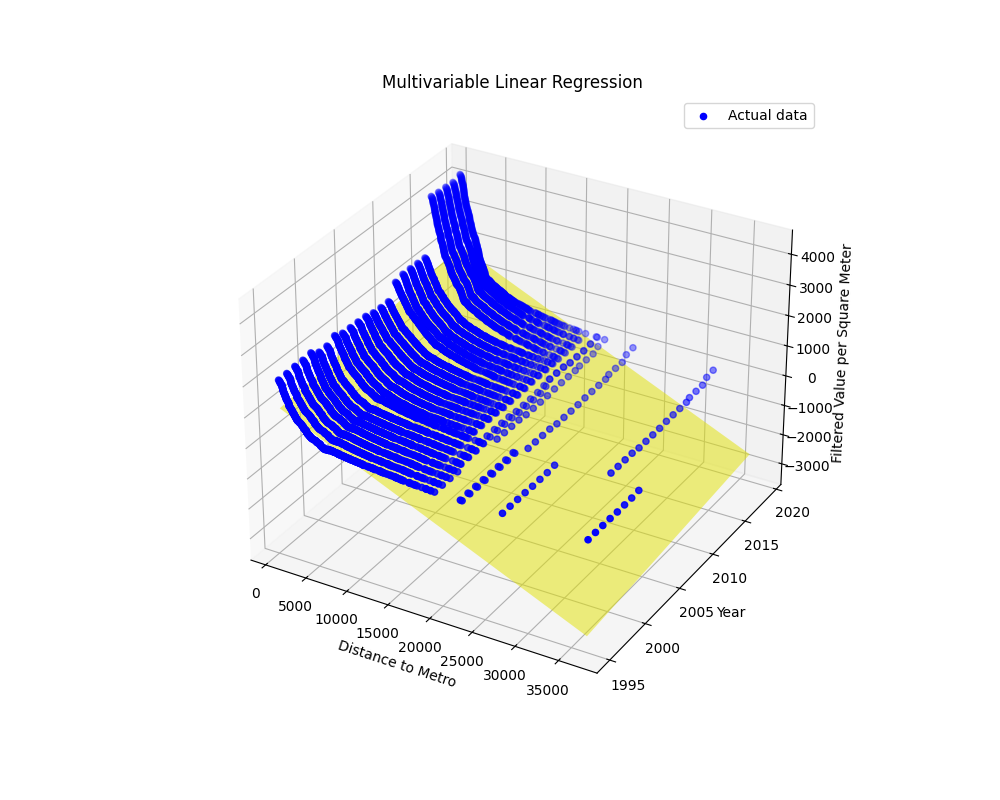

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Creating the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the actual data points
ax.scatter(df_final['dist_metro'], df_final['ano'], df_final['valor_m2_vpl_filtrado'], color='blue', label='Actual data')

# Creating a meshgrid for the plane
x_surf, y_surf = np.meshgrid(np.linspace(df_final['dist_metro'].min(), df_final['dist_metro'].max(), 100), 
                             np.linspace(df_final['ano'].min(), df_final['ano'].max(), 100))
z_surf = model.intercept_ + model.coef_[0] * x_surf + model.coef_[1] * y_surf

# Plotting the plane
ax.plot_surface(x_surf, y_surf, z_surf, color='yellow', alpha=0.5, rstride=100, cstride=100)

# Axes labels
ax.set_xlabel('Distance to Metro')
ax.set_ylabel('Year')
ax.set_zlabel('Filtered Value per Square Meter')

# Title and legend
ax.set_title('Multivariable Linear Regression')
ax.legend()

plt.show()


In [30]:
# y=e(a+bX+cZ),

# We need to ensure that all values of the dependent variable are positive for the logarithmic transformation
# Since the dataset contains negative values, we'll shift the data to ensure positivity
min_value = df_final['valor_m2_vpl_filtrado'].min()
shifted_value = abs(min_value) + 1  # Adding 1 to avoid log(0)

# Transforming the dependent variable
y_transformed = np.log(df_final['valor_m2_vpl_filtrado'] + shifted_value)

# Creating the linear regression model on the transformed data
model_exp = LinearRegression()
model_exp.fit(X, y_transformed)

# Predictions on the transformed scale
y_pred_transformed = model_exp.predict(X)

# Converting predictions back to the original scale
y_pred_original_scale = np.exp(y_pred_transformed) - shifted_value

# Calculating the R-squared value on the original scale
r2_exp = r2_score(df_final['valor_m2_vpl_filtrado'], y_pred_original_scale)

# Coefficients and R-squared for the exponential model
coefficients_exp = model_exp.coef_
intercept_exp = model_exp.intercept_, r2_exp

# coefficients_exp, intercept_exp, r2_exp
print("coefficients: ", coefficients_exp)
print("intercept:    ", intercept_exp)
print("r²:           ", r2_exp)

coefficients:  [-0.00018184  0.02094104]
intercept:     (-34.38999896973526, 0.7811783149932991)
r²:            0.7811783149932991


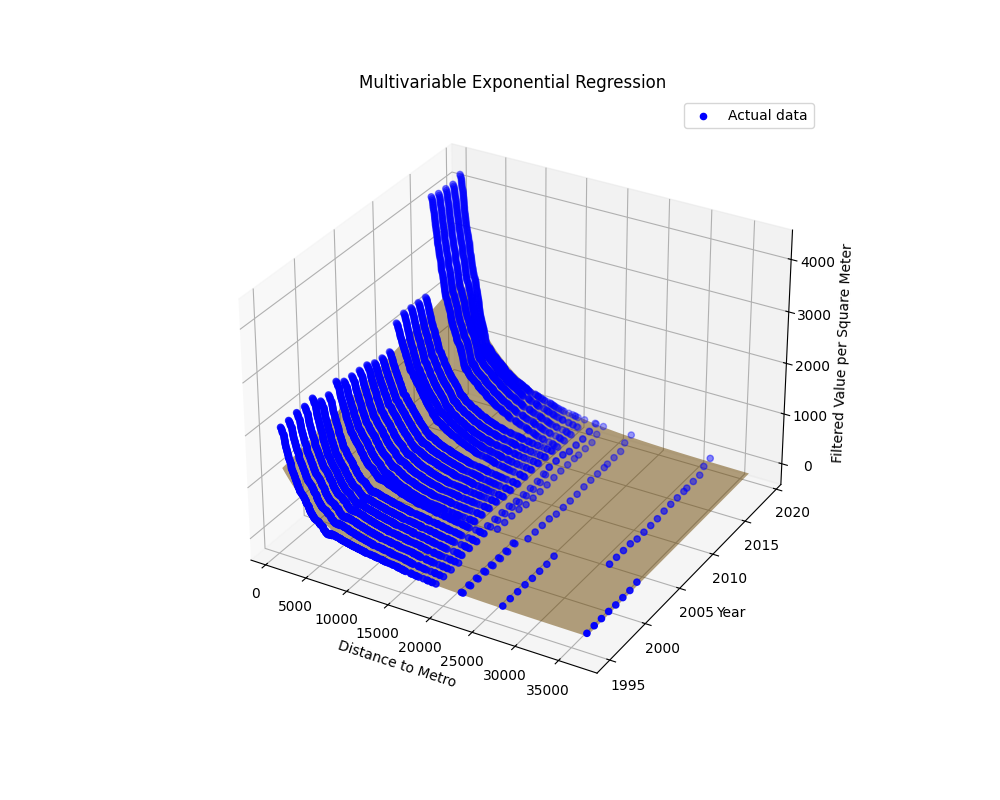

In [31]:
# Creating the 3D plot for the exponential regression model
fig_exp = plt.figure(figsize=(10, 8))
ax_exp = fig_exp.add_subplot(111, projection='3d')

# Plotting the actual data points
ax_exp.scatter(df_final['dist_metro'], df_final['ano'], df_final['valor_m2_vpl_filtrado'], color='blue', label='Actual data')

# Creating a meshgrid for the prediction surface
x_surf_exp, y_surf_exp = np.meshgrid(np.linspace(df_final['dist_metro'].min(), df_final['dist_metro'].max(), 100), 
                                     np.linspace(df_final['ano'].min(), df_final['ano'].max(), 100))

# Predictions for the surface
z_surf_exp_transformed = model_exp.intercept_ + model_exp.coef_[0] * x_surf_exp + model_exp.coef_[1] * y_surf_exp
z_surf_exp = np.exp(z_surf_exp_transformed) - shifted_value

# Plotting the prediction surface
ax_exp.plot_surface(x_surf_exp, y_surf_exp, z_surf_exp, color='orange', alpha=0.5, rstride=100, cstride=100)

# Axes labels
ax_exp.set_xlabel('Distance to Metro')
ax_exp.set_ylabel('Year')
ax_exp.set_zlabel('Filtered Value per Square Meter')

# Title and legend
ax_exp.set_title('Multivariable Exponential Regression')
ax_exp.legend()

plt.show()


In [35]:
import plotly.graph_objects as go

# Assuming you have the variables 'df_final', 'x_surf_exp', 'y_surf_exp', and 'z_surf_exp' as defined previously

# Creating the 3D plot using Plotly
fig_plotly = go.Figure()

# Adding the actual data points
fig_plotly.add_trace(go.Scatter3d(
    x=df_final['dist_metro'], 
    y=df_final['ano'], 
    z=df_final['valor_m2_vpl_filtrado'], 
    mode='markers',
    marker=dict(size=4, color='blue'),
    name='Actual data'
))

# Adding the prediction surface
fig_plotly.add_trace(go.Surface(
    x=x_surf_exp, 
    y=y_surf_exp, 
    z=z_surf_exp, 
    colorscale='Oranges',
    opacity=0.9,
    name='Prediction surface'
))

# Updating layout
fig_plotly.update_layout(
    title='Multivariable Exponential Regression with Plotly',
    scene=dict(
        xaxis_title='Distance to Metro',
        yaxis_title='Year',
        zaxis_title='Filtered Value per Square Meter'
    ),
    margin=dict(l=0, r=0, b=0, t=0)  # Tighten plot margins
)

# Save the figure as an HTML file
fig_plotly.write_html("3D_Plot_exponential.html")

# Optionally, display the plot in the notebook (this line can be omitted if not needed)
# fig_plotly.show()

# https://scipy.github.io/old-wiki/pages/Cookbook/SavitzkyGolay